In [13]:
%pip install tensorflow
%pip install tensorflow-datasets
%pip install scipy
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,AlphaDropout,Conv2D,Dropout,MaxPool2D
import tensorflow.keras.optimizers 
import numpy as np
import random

## load the data
(train, test) = tfds.load(
    'svhn_cropped',
    split=['train','test'],
    shuffle_files = True,
    as_supervised = True,
)

random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [15]:
train = train.take(2000)
test = test.take(500)

## normalize data [0,1]
def normalize_img(img,label):
    normalized_img = tf.cast(img, tf.float32) / 255
    return normalized_img, label

train_normalized = train.map(normalize_img)
test_normalized = test.map(normalize_img)

train_normalized = train_normalized.shuffle(2000).batch(32)
test_normalized = test_normalized.batch(32)


In [16]:
## build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.3),
    Dense(10, activation='softmax')
])

In [17]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam_optimizer,metrics=['accuracy'])
history = model.fit(train_normalized,epochs=15, validation_data=test_normalized)


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1905 - loss: 2.2601 - val_accuracy: 0.1840 - val_loss: 2.2573
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1950 - loss: 2.2434 - val_accuracy: 0.1840 - val_loss: 2.2248
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2650 - loss: 2.0813 - val_accuracy: 0.3700 - val_loss: 1.8003
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4510 - loss: 1.6438 - val_accuracy: 0.4780 - val_loss: 1.6199
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5990 - loss: 1.2301 - val_accuracy: 0.6240 - val_loss: 1.2457
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6875 - loss: 0.9897 - val_accuracy: 0.6620 - val_loss: 1.1188
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7295 - loss: 0.8204 - val_accuracy: 0.7040 - val_loss: 1.0815
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7875 - loss: 0.6691 - val_accuracy: 0.6980 - v

In [18]:
test_accuracy = model.evaluate(test_normalized)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7460 - loss: 1.1488


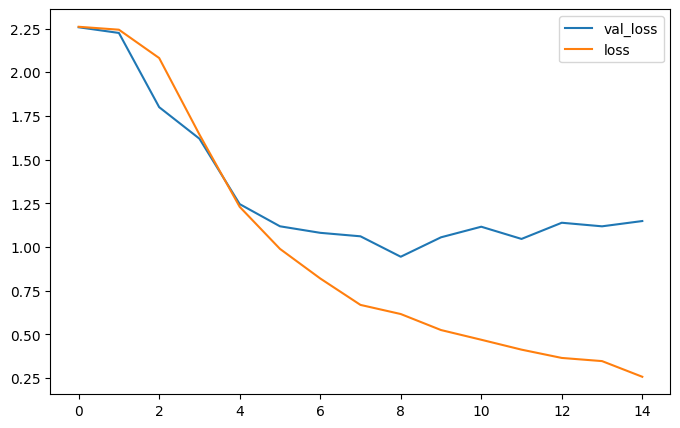

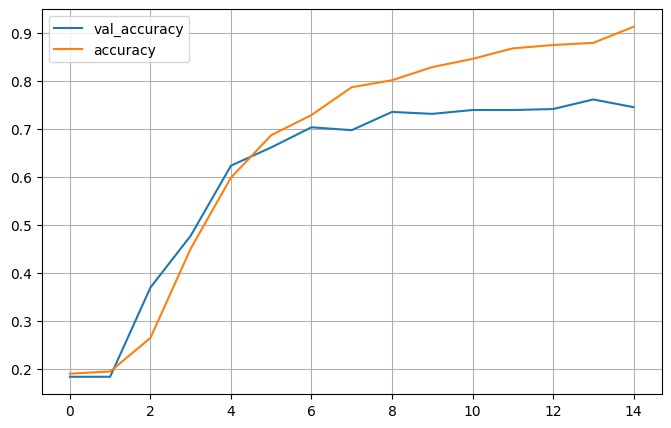

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.DataFrame(history.history)
dataframe[['val_loss', 'loss']].plot(figsize=(8,5))
dataframe[['val_accuracy', 'accuracy']].plot(figsize=(8,5))
plt.grid(True)
plt.show()